# [NA] MNIST classification with autoencoder

## Basic classification task with simple autoencoder

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000
5000
10000


In [5]:
# parameter and hyperparameter setting
pixel=28
image_size=pixel*pixel
n_class=10
n_hidden=200
n_latent=50

lr=0.001
training_epochs=15
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)
print(total_batch)

display_step=1
example_to_show=10

550


In [7]:
tf.reset_default_graph()

In [14]:
# autoencoder part
def weight_variable(shape):
#     return tf.Variable(tf.random_normal(shape=shape))
    return tf.Variable(tf.truncated_normal(shape=shape,stddev=0.1))

def bias_variable(shape):
#     return tf.Variable(tf.random_normal(shape=shape))
    return tf.Variable(tf.constant(shape=shape,value=0.1))

def fc_layer(inputs,n_outputs,activation_fn=tf.nn.relu,keep_prob=1):
    n_inputs=int(inputs.shape[1])
    W_fc=weight_variable([n_inputs,n_outputs])
    b_fc=bias_variable([n_outputs])
    logit_fc=tf.matmul(inputs,W_fc)+b_fc
    _a_fc=activation_fn(logit_fc)
    a_fc=tf.nn.dropout(_a_fc,keep_prob=keep_prob)
    return a_fc, logit_fc


In [15]:
x=tf.placeholder('float32',[None,image_size])
y_=tf.placeholder('float32',[None,n_class])

a1,_=fc_layer(x,n_hidden,activation_fn=tf.nn.sigmoid,keep_prob=1)
a2,_=fc_layer(a1,n_latent,activation_fn=tf.nn.sigmoid,keep_prob=1)
a3,_=fc_layer(a2,n_hidden,activation_fn=tf.nn.sigmoid,keep_prob=1)
a4,_=fc_layer(a3,image_size,activation_fn=tf.nn.sigmoid,keep_prob=1)

# W1=tf.Variable(tf.random_normal([image_size,n_hidden]))
# W2=tf.Variable(tf.random_normal([n_hidden,n_latent]))
# W3=tf.Variable(tf.random_normal([n_latent,n_hidden]))
# W4=tf.Variable(tf.random_normal([n_hidden,image_size]))
# b1=tf.Variable(tf.random_normal([n_hidden]))
# b2=tf.Variable(tf.random_normal([n_latent]))
# b3=tf.Variable(tf.random_normal([n_hidden]))
# b4=tf.Variable(tf.random_normal([image_size]))
# a1=tf.nn.sigmoid(tf.matmul(x,W1)+b1)
# a2=tf.nn.sigmoid(tf.matmul(a1,W2)+b2)
# a3=tf.nn.sigmoid(tf.matmul(a2,W3)+b3)
# a4=tf.nn.sigmoid(tf.matmul(a3,W4)+b4)


cost_autoencoder=tf.reduce_mean(tf.squared_difference(x,a4))
optimizer_autoencoder=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost_autoencoder)

# softmax classifier part
# y=fc_layer(a2,10)
Wc1=tf.Variable(tf.random_normal([n_latent,10]))
bc1=tf.Variable(tf.random_normal([10]))
y=tf.matmul(a2,Wc1)+bc1
cost_classifier=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y))
optimizer_classifier=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost_classifier)

# Fine tuning optimization
cost_total=cost_autoencoder+cost_classifier
optimizer_total=tf.train.AdamOptimizer(learning_rate=lr).minimize(cost_total)
print(cost_total)
print(optimizer_total)


Tensor("add_12:0", shape=(), dtype=float32)
name: "Adam_5"
op: "NoOp"
input: "^Adam_5/update_Variable_14/ApplyAdam"
input: "^Adam_5/update_Variable_15/ApplyAdam"
input: "^Adam_5/update_Variable_16/ApplyAdam"
input: "^Adam_5/update_Variable_17/ApplyAdam"
input: "^Adam_5/update_Variable_18/ApplyAdam"
input: "^Adam_5/update_Variable_19/ApplyAdam"
input: "^Adam_5/update_Variable_20/ApplyAdam"
input: "^Adam_5/update_Variable_21/ApplyAdam"
input: "^Adam_5/update_Variable_22/ApplyAdam"
input: "^Adam_5/update_Variable_23/ApplyAdam"
input: "^Adam_5/Assign"
input: "^Adam_5/Assign_1"



In [16]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
avg_cost_list=[]

for eapoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_value=sess.run([optimizer_autoencoder,cost_autoencoder],feed_dict={x:batch_xs})
    if epoch % display_step ==0:
        print("Epoch: ", '%04d' %(epoch+1), "cost=","{:.9f}".format(cost_value))
print("Autoencoder pre-training optimization finished.")


Epoch:  0001 cost= 0.048502833
Epoch:  0002 cost= 0.035553169
Epoch:  0003 cost= 0.031217378
Epoch:  0004 cost= 0.025092285
Epoch:  0005 cost= 0.020841561
Epoch:  0006 cost= 0.020345965
Epoch:  0007 cost= 0.018551892
Epoch:  0008 cost= 0.016859896
Epoch:  0009 cost= 0.014645469
Epoch:  0010 cost= 0.014611692
Epoch:  0011 cost= 0.013009502
Epoch:  0012 cost= 0.011920376
Epoch:  0013 cost= 0.012929883
Epoch:  0014 cost= 0.011352038
Epoch:  0015 cost= 0.012269545
Autoencoder pre-training optimization finished.


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


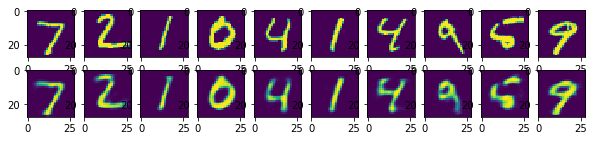

In [17]:
x_reconstructed=sess.run(a4,feed_dict={x:mnist.test.images[:example_to_show]})
f,a=plt.subplots(2,10,figsize=(10,2))
for i in range(example_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(pixel,pixel)))
    a[1][i].imshow(np.reshape(x_reconstructed[i],(pixel,pixel)))
f.show()
plt.draw()
plt.show()

In [18]:
plt.close()
# training softmax classificer with latent features
avg_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_value=sess.run([optimizer_classifier,cost_classifier],
                              feed_dict={x:batch_xs,y_:batch_ys})
    if epoch % display_step ==0:
        print("Epoch: ", '%04d' %(epoch+1), "cost=","{:.9f}".format(cost_value))
print("Classifier optimization finished.")

Epoch:  0001 cost= 0.341930002
Epoch:  0002 cost= 0.159727082
Epoch:  0003 cost= 0.093524702
Epoch:  0004 cost= 0.065358609
Epoch:  0005 cost= 0.045924425
Epoch:  0006 cost= 0.017592929
Epoch:  0007 cost= 0.078785665
Epoch:  0008 cost= 0.089591295
Epoch:  0009 cost= 0.039724987
Epoch:  0010 cost= 0.023918467
Epoch:  0011 cost= 0.038497224
Epoch:  0012 cost= 0.013839857
Epoch:  0013 cost= 0.008711847
Epoch:  0014 cost= 0.004545196
Epoch:  0015 cost= 0.004082967
Classifier optimization finished.


In [19]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype='float32'))
ac=sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print('Accuracy (before fine-tuning): '+str(ac*100)+'%')

Accuracy (before fine-tuning): 97.99000024795532%


In [20]:
# fine-tuning softmax model
avg_cost_list=[]

for epoch in range(training_epochs):
    avg_cost=0.
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_value=sess.run([optimizer_total,cost_total],
                              feed_dict={x:batch_xs,y_:batch_ys})
    if epoch % display_step ==0:
        print("Epoch: ", '%04d' %(epoch+1), "cost=","{:.9f}".format(cost_value))
print("Fine-tuning softmax model optimization finished.")

Epoch:  0001 cost= 0.037147880
Epoch:  0002 cost= 0.036267728
Epoch:  0003 cost= 0.029677276
Epoch:  0004 cost= 0.027072204
Epoch:  0005 cost= 0.023096450
Epoch:  0006 cost= 0.021558266
Epoch:  0007 cost= 0.022740386
Epoch:  0008 cost= 0.023602173
Epoch:  0009 cost= 0.024095859
Epoch:  0010 cost= 0.019877555
Epoch:  0011 cost= 0.018244416
Epoch:  0012 cost= 0.016088493
Epoch:  0013 cost= 0.015347683
Epoch:  0014 cost= 0.015308597
Epoch:  0015 cost= 0.013620300
Fine-tuning softmax model optimization finished.


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


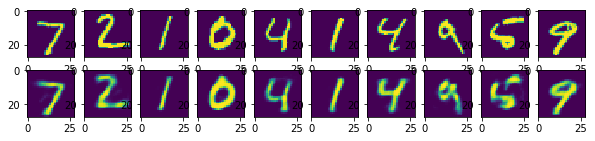

In [21]:
x_reconstructed=sess.run(a4,feed_dict={x:mnist.test.images[:example_to_show]})
f,a=plt.subplots(2,10,figsize=(10,2))
for i in range(example_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(pixel,pixel)))
    a[1][i].imshow(np.reshape(x_reconstructed[i],(pixel,pixel)))
f.show()
plt.draw()
plt.show()

In [22]:
ac=sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels})
print('Accuracy (before fine-tuning): '+str(ac*100)+'%')
# is there significant change in accuracy? 
# why? maybe small learning rate? or network modeling?

Accuracy (before fine-tuning): 98.12999963760376%


In [23]:
tf.reset_default_graph()
sess.close()